In [1]:
import argparse
import os

import seaborn as sns
import numpy as np

In [2]:
import sys
sys.argv = ['']


In [3]:
%load_ext autoreload
%autoreload 2


In [10]:
load_path = ("../mbespoketart/trained_model/2023-11-11:01-00-21")

In [11]:
metrics = {}
for file in os.listdir(load_path):
    if ".npy" not in file:
        continue 

    metrics[file[:file.index(".")]] = np.load(os.path.join(load_path,file))


In [12]:
for key in metrics:
    if "test" in key and "loss" not in key and 'lr' not in key:
        ax = sns.lineplot(x=[i for i in range(1,1+len(metrics[key]))],
                     y=metrics[key], label=key)

In [13]:
for key in metrics:
    if "train" in key and "loss" not in key and 'lr' not in key:
        ax = sns.lineplot(x=[i for i in range(1,1+len(metrics[key]))],
                          y=metrics[key], label=key)


<Axes: >

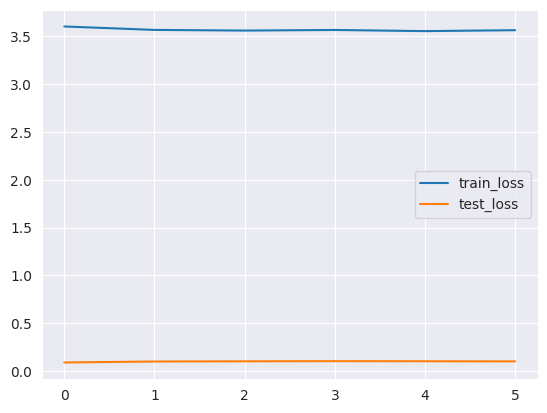

In [19]:
sns.lineplot(x=[i for i in range(len(metrics["train_loss"]))],
             y=metrics["train_loss"], label="train_loss")
sns.lineplot(x=[i for i in range(len(metrics["val_loss"]))],
             y=metrics["val_loss"], label="test_loss")


In [15]:
metrics

{'val_correct': array([0, 0, 0, 0, 0, 0]),
 'val_f1': array([0, 0, 0, 0, 0, 0]),
 'train_loss': array([3.59953494, 3.56373568, 3.55673984, 3.56306164, 3.55114451,
        3.56077958]),
 'val_loss': array([0.0916361 , 0.10181966, 0.10389575, 0.10549845, 0.10447694,
        0.10305091])}

In [9]:
from data.transcript_dm import TranscriptDataset
from transformers import AutoTokenizer
from torch.utils.data import DataLoader
from train import collate_fn, build_parser
import torch
from trainer import Trainer
from types import SimpleNamespace
import json 
import argparse
from model import GPT
from train import get_latest_model



ImportError: cannot import name 'GPT' from 'model' (/home/seanleishman/BespokeTart/mbespoketart/model.py)

In [37]:
ts = TranscriptDataset(
        tokenizer=AutoTokenizer.from_pretrained("bert-base-uncased"), overwrite=False)
ts.setup()
dl = DataLoader(ts, batch_size=320, collate_fn=collate_fn)

In [38]:
load_path = "/home/seanleishman/BespokeTart/gptonly/trained_model/2023-11-11:17-31-35"

config = build_parser(parse_args=True)

with open(os.path.join(load_path, "config.json")) as f:
    new_config = SimpleNamespace(**json.load(f))
    for arg in vars(new_config):
        config.arg = getattr(new_config, arg)
config.device = "cuda" if torch.cuda.is_available() and (
        config.cuda == "true") else "cpu"

TypeError: build_parser() got an unexpected keyword argument 'parse_args'

In [ ]:
model = GenerationBert(
            bert_finetuning=False,
            config=config,
        )

In [ ]:
config

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(config.device)
optimizer = torch.optim.AdamW(model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay)

In [ ]:
trainer = Trainer(model=model, criterion=criterion,
                          optimizer=optimizer, config=config,
                          load_from_checkpoint=get_latest_model(load_path))

In [ ]:
speech = ["Hello my name is Sean Leishman", "yes there are", "uh"]
tokens = model.tokenizer(speech, return_tensors="pt", padding=True, truncation=True)

In [ ]:
tokens

In [ ]:
tokens['input_ids'][:, 1:-1]

In [ ]:
model.tokenizer.batch_decode(model.generate(tokens['input_ids'][:, 1:-1]))

In [ ]:
model.generation_config

In [ ]:
next(iter(dl))